# Mixture Fractions

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 7 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 19 February 2020.

The objective of this tutorial is to review the basic concept and definition of a mixture fraction, to explain the relationship between mixture fraction and equivalence ratio, and to show how one can define a mixture fraction for a reacting ideal-gas mixture using Cantera's `Solution()` object. We will use the element and species data that are included in gri30.cti.

The reader should be familiar with the material in the previous tutorial Notebook (7_1_Molecular_transport_properties) before working through this Notebook.

## 1. Concept and definitions

As discussed in Chapter 7 of Turns 4th ed., a *mixture fraction* is an example of a *conserved scalar*: that is, the equation governing the spatial and temporal evolution of a mixture fraction in a combustion system contains no chemical source term. A mixture fraction is a particular conserved scalar that is defined such that its local value at any point in a chemically reacting mixture corresponds to the local mass fraction of mixture that originated from the fuel (versus from the oxidizer). As we will see later in Chapters 9 and 13, mixture fractions are useful in describing nonpremixed (or diffusion) flames. 

A mixture fraction can be written as a linear combination of species mass fractions. The particular linear combination that is needed is one such that: its value is equal to one in pure fuel; its value is equal to zero in pure oxidizer; and its net chemical source term is equal to zero. 

For the idealized case of a system that contains three generic species (fuel, oxidizer, and product), an appropriate definition for the local value of the mixture fraction $f$ in terms of the local values of the species mass fractions ($Y_{F}$, $Y_{Ox}$, and $Y_{Pr}$ for fuel, oxidizer, and product, respectively) is:

$$ f \equiv Y_F + \frac{Y_{Pr}}{\nu + 1} $$

where $\nu$ is the mass of oxidizer required per unit mass of fuel to form $ 1 + \nu $ mass units of product. This definition satisfies the three key requirements, since the local fuel, oxidizer, and product mass fractions must sum to one everywhere: $Y_F$ and $Y_{Pr}$ are both equal to zero in pure oxidizer (where $Y_{Ox} = 1$), while $Y_{Ox}$ and $Y_{Pr}$ are both equal to zero in pure fuel (where $Y_{F} = 1$).

A more general definition of a mixture fraction for a system that contains an arbitrary number of species $N_{spec}$ is in terms of appropriately normalized elemental mass fractions. As defined in tutorial Notebook 2_1_Mass_moles_molecular_weights_mixtures, the mass fraction of element $ \alpha $ in a mixture containing $ N_{elem} $ elements and $N_{spec}$ species, denoted as $z_{\alpha} $, is a linear combination of species mass fractions. Specifically:

$$ z_{\alpha} = W_{\alpha} \sum _ {i=1}^{N_{spec}} \bigl( n_{i \alpha} Y_i / MW_i \bigr) $$

where the notation is the same as that used in Notebook 2_1_Mass_moles_molecular_weights_mixtures. The equation for $z_{\alpha}$ contains no chemical source term; element mass fractions are conserved in chemical reactions. It remains, then, to choose an appropriate element (or elements) and normalization such that the value is equal to one in pure fuel and to zero in pure oxidizer. For the case of a hydrocarbon fuel (a fuel molecule that contains only carbon and hydrogen atoms) and our standard approximation for air oxidizer (so that the oxidizer contains only oxygen and nitrogen atoms), it is evident that all carbon and all hydrogen in the system come from the fuel, while all oxygen and nitrogen in the system come from the oxidizer. For example, if reactions occur that eventually form $CO_2$ and $H_2O$, the carbon in the $CO_2$ and the hydrogen in the $H_2O$ originated from the fuel, while the oxygen in both came from the oxidizer. In that case, three possible definitions for a mixture fraction are as follows:

$$ f = f_C \equiv \frac{z_{C}}{z_{C,fuel}} $$

where $z_{C,fuel} $ is the mass fraction of carbon in the fuel molecule;

$$ f = f_H \equiv \frac{z_{H}}{z_{H,fuel}} $$

where $z_{H,fuel} $ is the mass fraction of hydrogen in the fuel molecule; or:

$$ f = f _ {CH} \equiv z_{C} + z_{H} $$

where no further normalization is required, since $z_{C+H,fuel} = 1$. A somewhat more general definition is needed in cases where an element is present in both the fuel and in the oxidizer. In that case, a mixture fraction based on the elemental mass fraction for element $ \alpha $ can be defined as:

$$ f = f _ {\alpha} \equiv \frac{z_{\alpha} - z_{\alpha,oxid}}{z_{\alpha,fuel} - z_{\alpha,oxid}} $$

where $ z_{\alpha,fuel} $ and $ z_{\alpha,oxid} $ are the elemental mass fractions for element $ \alpha $ in the fuel and in the oxidizer, respectively.

In the case where all species diffuse at equal rates in the gas mixture (no differential diffusion), the local values of all elemental-mass-fraction-based mixture mixtures will be the same. In the more general case where different species diffuse at different rates, the values will be different for different elements. As we saw in tutorial Notebook 7_1_Molecular_transport_properties, different species do, in fact, diffuse at different rates. We will look at this, and at other aspects of mixture fractions, when we get to Chapter 9 (Laminar Diffusion Flames) and Chapter 13 (Turbulent Nonpremixed Flames) of Turns 4th ed. The advantages of introducing mixture fractions should become clearer when we get to that point.

## 2. Mixture fractions in Cantera

Let's go ahead and define a gas mixture using gri30.cti and Cantera's `Solution()` object:

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define the gas mixture
gas = ct.Solution('gri30.cti')

As we saw in Notebook 2_1_Mass_moles_molecular_weights_mixtures, the [`elemental_mass_fraction()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.elemental_mass_fraction) attribute can be used to access the elemental mass fractions of each element in the gas mixture:

In [3]:
# print the elemental mass fractions of carbon, hydrogen, oxygen, and nitrogen in the gas mixture
gas.elemental_mass_fraction('C'), gas.elemental_mass_fraction('H'), \
gas.elemental_mass_fraction('O'),gas.elemental_mass_fraction('N')

(0.0, 1.0, 0.0, 0.0)

Recall that the composition of "gas" is currently the default composition of 100% H2. So the elemental mass fraction of hydrogen in the gas mixture is equal to one, and the elemental mass fractions of all other elements are equal to zero.

For the remainder of this tutorial, we will consider ethane (C2H6) fuel and use our standard approximation for air as our oxidizer. The temperature and pressure of the mixture are not relevant, for our purposes in this tutorial.

We reset the gas mixture to correspond to pure fuel, for purposes of finding the elemental mass fractions of carbon and hydrogen in the fuel:

In [4]:
gas.TPX = None , None , {'C2H6':1.0}

gas()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.22149  kg/m^3
  mean mol. weight         30.0696  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.7853e+06       -8.375e+07     J
   internal energy     -2.8683e+06       -8.625e+07     J
           entropy          7633.8        2.295e+05     J/K
    Gibbs function     -5.0755e+06       -1.526e+08     J
 heat capacity c_p          1753.2        5.272e+04     J/K
 heat capacity c_v          1476.7         4.44e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
              C2H6              1                1         -61.1855
     [  +52 minor]              0                0



In [5]:
# store and print the elemental mass fractions of carbon and hydrogen in the C2H6 fuel
z_Cfuel = gas.elemental_mass_fraction('C')
z_Hfuel = gas.elemental_mass_fraction('H')

z_Cfuel , z_Hfuel

(0.7988788691849985, 0.20112113081500146)

These are very close to the values that one would get using approximate atomic weights for the elements: $ z_{C,fuel} \approx 2 \times 12 / ( 2 \times 12 + 6 \times 1 ) = 0.80 $ and $ z_{H,fuel} \approx 6 \times 1 / ( 2 \times 12 + 6 \times 1 ) = 0.20 $.

Now let's reset the composition to correspond to a stoichiometric mixture of ethane (C2H6) and air, using our standard approximation for air:

In [6]:
# set the gas mixture to a stoichiometric mixture of ethane and air
fuel = 'C2H6'
air  = {'O2':1.0, 'N2':3.76}
phi  = 1.0
gas.set_equivalence_ratio(phi,fuel,air)

# print the gas mixture thermochemical state
gas()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.17478  kg/m^3
  mean mol. weight         28.9198  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      -1.622e+05       -4.691e+06     J
   internal energy     -2.4845e+05       -7.185e+06     J
           entropy            6998        2.024e+05     J/K
    Gibbs function     -2.2616e+06        -6.54e+07     J
 heat capacity c_p          1053.8        3.048e+04     J/K
 heat capacity c_v          766.32        2.216e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.198188         0.219289         -26.2923
              C2H6      0.0566251        0.0588766         -64.0568
                N2       0.745187         0.721835         -23.3272
     [  +50 minor]        

Note that the mass fraction of fuel in the stoichiometric fuel-air mixture is approximately 0.0589. By definition, then, this is the value of the mixture fraction in a stoichiometric mixture of C2H6 and air: $ f_{stoich} = 0.0589 $.

Now compute three different values for the mixture fraction, as defined in Section 1 above:

In [7]:
# compute and print three different elemental-mass-fraction-based mixture fractions
f_C  = gas.elemental_mass_fraction('C') / z_Cfuel
f_H  = gas.elemental_mass_fraction('H') / z_Hfuel
f_CH = gas.elemental_mass_fraction('C') + gas.elemental_mass_fraction('H')

f_C , f_H , f_CH

(0.05887663098913928, 0.05887663098913927, 0.05887663098913928)

All three values are the same, as they must be.

Now reset the gas mixture composition to correspond to equilibrium products of constant-pressure-adiabatic combustion, and recompute the mixture-fraction values:

In [8]:
# reset the gas mixture to correspond to equilibrium products of constant-pressure adiabatic combustion
gas.equilibrate('HP')

# print the gas mixture thermochemical state
gas()


  gri30:

       temperature          2259.6  K
          pressure          101325  Pa
           density        0.150333  kg/m^3
  mean mol. weight         27.8743  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      -1.622e+05       -4.521e+06     J
   internal energy      -8.362e+05       -2.331e+07     J
           entropy          9758.2         2.72e+05     J/K
    Gibbs function     -2.2212e+07       -6.191e+08     J
 heat capacity c_p          1488.2        4.148e+04     J/K
 heat capacity c_v          1189.9        3.317e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00346831       0.00025083         -25.5386
                 H    0.000460984      1.66693e-05         -12.7693
                 O    0.000292645      0.000167974         -17.1951
                O2     0.0

In [9]:
# compute and print three different elemental-mass-fraction-based mixture fractions
f_C  = gas.elemental_mass_fraction('C') / z_Cfuel
f_H  = gas.elemental_mass_fraction('H') / z_Hfuel
f_CH = gas.elemental_mass_fraction('C') + gas.elemental_mass_fraction('H')

f_C , f_H , f_CH

(0.05887663099016989, 0.058876630989412246, 0.05887663099001751)

Again, the three values are the same, and they are equal to the values in the initial fuel-air mixture. Elemental mass fractions and mixture fractions do not change as a result of chemical reactions.

Finally, we note that Cantera does have a built-in function that returns the value of an element-mass-fraction based mixture fraction: the [`mixture_fraction()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/onedim.html#cantera.CounterflowDiffusionFlame.mixture_fraction) attribute. However, to use this function, it is necessary to tell Cantera what the fuel is and what the oxidizer is, so that it can do the appropriate normalization. The attribute `mixture_fraction()` is not even defined at this point in our Notebook, as you can verify by trying to access it. It is defined only when we define an appropriate flame object, such as a [`CounterflowDiffusionFlame()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/onedim.html#counterflowdiffusionflame). We will do that when we get to Chapter 9.

## 3. Relationship to equivalence ratio

The equivalence ratio $ \Phi $ was defined in Chapter 2 of Turns 4th ed. (see also tutorial Notebook 2_2_Stoichiometry) in terms of the fuel-to-oxidizer mass ratio (fuel-to-air ratio $(F/A)$, for the case of air oxidizer) as:

$$ \Phi \equiv \frac{(F/A)}{(F/A)_{stoich}} $$

where $(F/A)_{stoich}$ is the stoichiometric fuel-to-air ratio. The local value of the fuel-to-air ratio $(F/A)$ and the local value of the mixture fraction $f$ are related by:

$$ (F/A) = \frac{f}{1-f} $$

Note that $(F/A)=0$ for $f$ = 0 (pure air), $(F/A)\rightarrow \infty$ for $f$ = 1 (pure fuel), and $ (F/A)_{stoich} = \frac{f_{stoic}}{1-f_{stoich}}$, where $ f_{stoich} $ is the value of the fuel mass fraction in a stoichiometric fuel-air mixture: $ f_{stoich} = \bigl( F/(F+A) \bigr) _ {stoich}$. It then follows that:

$$ \Phi = \frac{f ( 1 - f_{stoich} )}{f_{stoich} ( 1-f) } $$

This is consistent with the limiting cases: $ \Phi = 0 $ for $ f = 0 $, $ \Phi \rightarrow \infty $ for $ f = 1 $, and $ \Phi = 1 $ for $ f = f_{stoich} $.

Let's plot the relationship between $ \Phi $ and $f$ for ethane-air reactant mixtures:

In [10]:
# compute equivalence ratio as a function of mixture fraction
fmin = 0.
fmax = 1.
finc = 0.01
farr = np.arange(fmin,fmax,finc)
nf   = len(farr)
phiarr = np.zeros(nf)

# f_st is the stoichiometric mixture-fraction value, which we computed earlier
f_st = f_C

for i, f in enumerate(farr):
    phiarr[i] = f*( 1. - f_st ) / f_st / ( 1. - f )

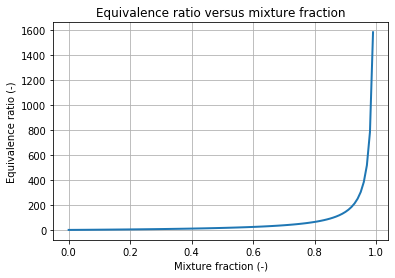

In [11]:
# plot equivalence ratio as a function of mixture fraction
fig, ax = plt.subplots()
ax.plot(farr, phiarr, label='Phi',   lw=2)
ax.set(xlabel='Mixture fraction (-)',
       ylabel='Equivalence ratio (-)',
       title ='Equivalence ratio versus mixture fraction')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Phi_vs_f.pdf")

This scaling obscures the behavior for stoichiometric and fuel-lean reactant mixtures, but it serves to make one important point regarding mixture fractions versus equivalence ratios: mixture fraction is limited to the range 0-1, while equivalence ratio ranges from 0 to $\infty$. 

Replot for a narrower range of equivalence ratios around $ \Phi = 1 $:

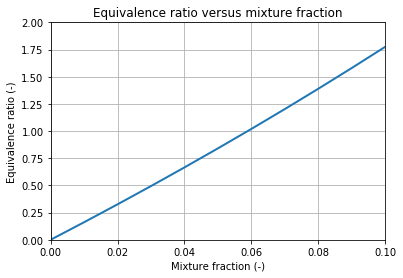

In [12]:
# plot equivalence ratio as a function of mixture fraction
fig, ax = plt.subplots()
ax.plot(farr, phiarr, label='Phi',   lw=2)
ax.set(xlim=(0.,0.1),
       ylim=(0.,2.0),
       xlabel='Mixture fraction (-)',
       ylabel='Equivalence ratio (-)',
       title ='Equivalence ratio versus mixture fraction')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Phi_vs_f_zoomed.pdf")

Over this range, the relationship between $\Phi$ and $f$ is close to (but not exactly) linear. Note that $\Phi=1$ where $f=f_{stoich}$. As we have seen, the value of $ f_{stoich} $ varies depending on the fuel and oxidizer that are considered, but for most hydrocarbon-fuel/air-oxidizer mixtures, the value of $ f_{stoich} $ remains in a relatively narrow range around 0.06.

The equivalence ratio $ \Phi $ normally is defined for a particular unburned fuel-oxidizer reactant mixture. From this development, it can be seen that the value of $\Phi$ (or of $f$) does not change as a result of chemical reaction: its value in the equilibrium products of combustion is equal to its value in the unburned reactants, and to its value at any intermediate partially burned state. The local value of $f$ tells us something about the state of the mixing between fuel an oxidizer, then, rather than something about the degree of completeness of chemical reactions. 

The mixture fraction provides no new information in a premixed system, compared to quantities that we have introduced earlier. Mixture fractions are useful principally in nonpremixed systems, as we will see when we get to Chapters 9 (Laminar Diffusion Flames) and 13 (Turbulent Nonpremixed Flames).